# **Importação das Bibliotecas**

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, f1_score

# **Importação do dataset**

In [15]:
# Carrega o arquivo do dataset para a sessão do notebook
dataset = pd.read_csv('/content/heart.csv')

# Todos os atributos menos o alvo, estão em X
X = dataset.iloc[:, :-1].values

# atributo alvo guardado em y
y = dataset.iloc[:, -1].values

In [16]:
# Mostra o total de entradas e o número de atributos: (303, 14)
dataset.shape

(303, 14)

In [17]:
# Exibe as primeiras linhas do dataset como exemplo
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Confirma inexistência de atributos não preenchidos
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [19]:
# Exibe o número de exemplos na classe positiva e negativa do atributo alvo. O dataset está bem balanceado.
print(dataset['output'].value_counts())

1    165
0    138
Name: output, dtype: int64


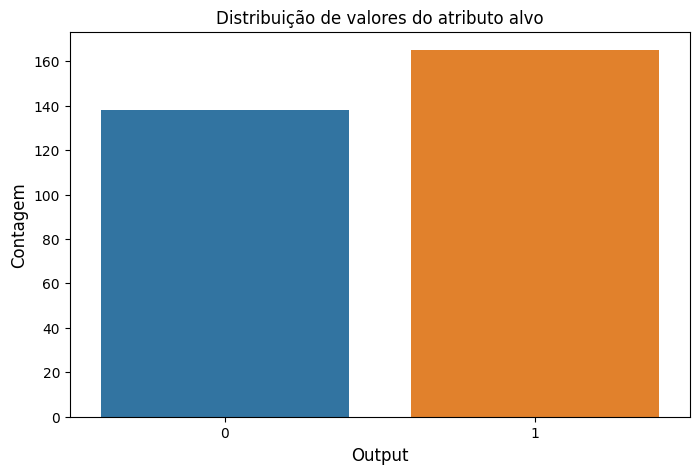

In [20]:
# Plota um gráfico de colunas com o valores do atributo alvo.
plt.figure(figsize = (8, 5))
sns.countplot(x = dataset['output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Contagem", size = 12)
plt.title("Distribuição de valores do atributo alvo", size = 12)
print()

# **Separando o dataset entre partição de treino e teste**

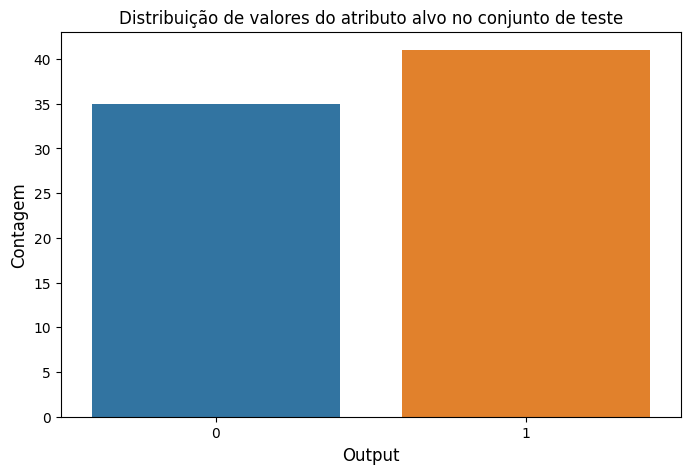

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
plt.figure(figsize = (8, 5))
sns.countplot(x = y_test)
plt.xlabel("Output", size = 12)
plt.ylabel("Contagem", size = 12)
plt.title("Distribuição de valores do atributo alvo no conjunto de teste", size = 12)
print()

# **Normalização dos valores dos atributos(Feature Scaling)**

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)

# **SVM**

In [23]:
from sklearn.svm import SVC
classifier = SVC(probability=True)
classifier.fit(X_train, y_train)

SVC(probability=True)

# **Aplicando o conjunto de teste no classificador SVM**

In [24]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


# **Matriz de confusão**

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Acurácia = ",accuracy_score(y_test, y_pred))
print("F1       = ", f1_score(y_test, y_pred))

[[30  5]
 [ 4 37]]
Acurácia =  0.881578947368421
F1       =  0.8915662650602411


# **Resultados da etapa de teste(gráfico)**

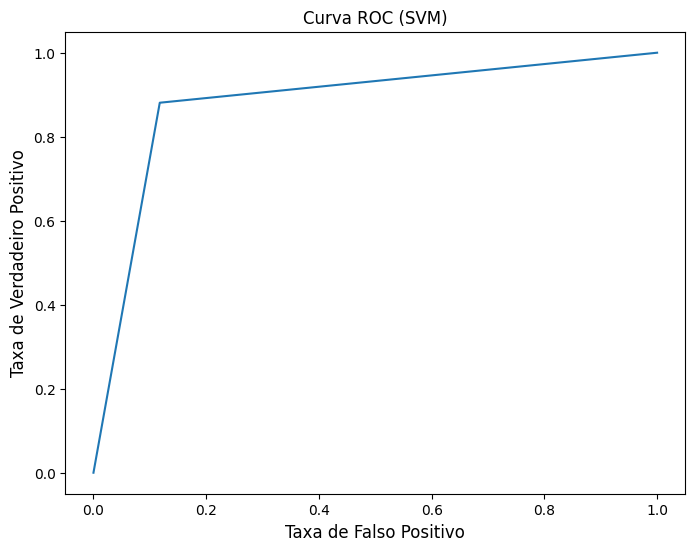

In [26]:
fpr, tpr, threshould = roc_curve(y_pred, y_test)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("Taxa de Falso Positivo", size = 12)
plt.ylabel("Taxa de Verdadeiro Positivo", size = 12)
plt.title("Curva ROC (SVM)", size = 12)
print()